In [ ]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 71.4 MB/s eta 0:00:00


In [ ]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.9 MB/s eta 0:00:00


<ipython-input-14-f2eff6499204>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="EV_Count", y="City", data=top_ev_cities, palette="Reds_r")


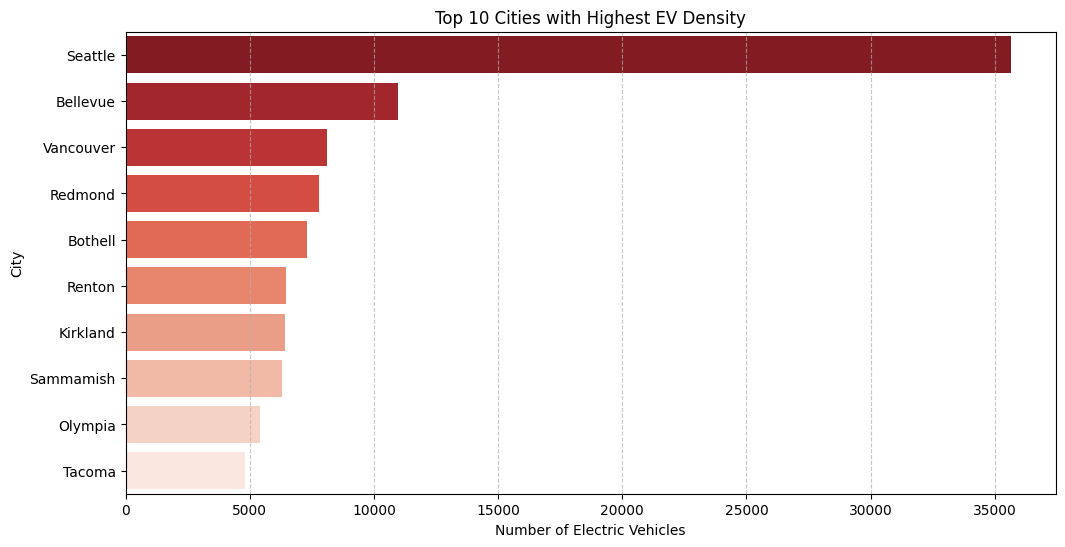

<ipython-input-14-f2eff6499204>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="BEV_Count", y="City", data=top_bev_cities, palette="Blues_r")


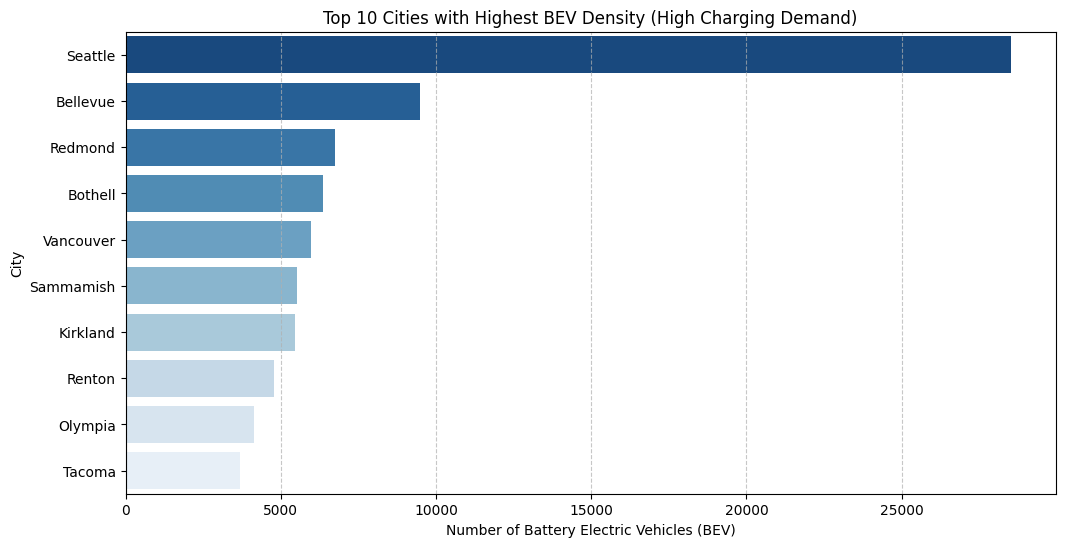

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate EV counts by city
ev_city_counts = df.groupby("City")["VIN (1-10)"].count().reset_index()
ev_city_counts.columns = ["City", "EV_Count"]

# Identify high-density areas (top 10 cities with highest EV count)
top_ev_cities = ev_city_counts.sort_values(by="EV_Count", ascending=False).head(10)

# Plot the top cities with the highest EV count
plt.figure(figsize=(12, 6))
sns.barplot(x="EV_Count", y="City", data=top_ev_cities, palette="Reds_r")
plt.xlabel("Number of Electric Vehicles")
plt.ylabel("City")
plt.title("Top 10 Cities with Highest EV Density")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Identify areas with a high number of BEVs (which require charging infrastructure)
bev_cities = df[df["Electric Vehicle Type"].str.contains("Battery Electric Vehicle", na=False)]
bev_city_counts = bev_cities.groupby("City")["VIN (1-10)"].count().reset_index()
bev_city_counts.columns = ["City", "BEV_Count"]

# Top 10 cities with highest BEV count
top_bev_cities = bev_city_counts.sort_values(by="BEV_Count", ascending=False).head(10)

# Plot BEV-specific high-density areas
plt.figure(figsize=(12, 6))
sns.barplot(x="BEV_Count", y="City", data=top_bev_cities, palette="Blues_r")
plt.xlabel("Number of Battery Electric Vehicles (BEV)")
plt.ylabel("City")
plt.title("Top 10 Cities with Highest BEV Density (High Charging Demand)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# Re-import necessary libraries since the execution state was reset
import pandas as pd
import folium
import re
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap

# Reload the dataset
file_path = "/content/drive/MyDrive/IEEE (EV PROBLEM)/DATA_SET/Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

# Extract latitude and longitude from 'Vehicle Location' column
def extract_coordinates(point_str):
    match = re.search(r"POINT \(([-\d.]+) ([-\d.]+)\)", str(point_str))
    if match:
        return float(match.group(2)), float(match.group(1))  # (lat, lon)
    return None

# Apply extraction function
df["Coordinates"] = df["Vehicle Location"].apply(extract_coordinates)
df.dropna(subset=["Coordinates"], inplace=True)

# Aggregate EV counts by city
ev_city_counts = df.groupby("City")["VIN (1-10)"].count().reset_index()
ev_city_counts.columns = ["City", "EV_Count"]

# Identify high-density areas (top 10 cities with highest EV count)
top_ev_cities = ev_city_counts.sort_values(by="EV_Count", ascending=False).head(10)

# Identify areas with a high number of BEVs (which require charging infrastructure)
bev_cities = df[df["Electric Vehicle Type"].str.contains("Battery Electric Vehicle", na=False)]
bev_city_counts = bev_cities.groupby("City")["VIN (1-10)"].count().reset_index()
bev_city_counts.columns = ["City", "BEV_Count"]

# Top 10 cities with highest BEV count
top_bev_cities = bev_city_counts.sort_values(by="BEV_Count", ascending=False).head(10)

# Create a base map centered around Seattle (Washington state)
m = folium.Map(location=[47.5, -122.5], zoom_start=7)

# Add heatmap for EV density
heat_data = [(lat, lon) for lat, lon in df["Coordinates"]]
HeatMap(heat_data, radius=10, blur=15).add_to(m)

# Identify key cities needing new charging stations
charging_station_cities = top_bev_cities["City"].tolist()

# Mark recommended charging station locations
for _, row in df.iterrows():
    if row["City"] in charging_station_cities:
        lat, lon = row["Coordinates"]
        folium.Marker(
            location=[lat, lon],
            popup=f"Recommended Charging Station: {row.City}",
            icon=folium.Icon(color="blue", icon="bolt", prefix="fa"),
        ).add_to(m)

# Save the interactive map
map_path = "ev_density_and_charging_stations_count.html"
m.save(map_path)
map_path


'ev_density_and_charging_stations_count.html'

**HERE IS A LAST FILE IS UPLOADED IN RESPECTIVE GITHUB/DRIVE LOCATION KINDLY CHECK IT OUT.. IT IS A COUNT OF NUMBER OF CHARGING STATION IN THAT SPECIFIC AREA ...**